In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'nfile' is the DataFrame from the combined .txt files
# Example data structure
# nfile = pd.read_csv("combined_output.csv")

# Define intervals for 'Peak Field on Sample [mT]'
intervals = [
    {"center": 20, "tolerance": 3},
    {"center": 30, "tolerance": 3},
    {"center": 40, "tolerance": 5},
    {"center": 50, "tolerance": 5}
]

results = []

# Calculate mean and standard deviation for each interval
for interval in intervals:
    lower_bound = interval["center"] - interval["tolerance"]
    upper_bound = interval["center"] + interval["tolerance"]
    
    # Filter data within the interval
    filtered_data = nfile[
        (nfile["Peak Field on Sample [mT]"] >= lower_bound) & 
        (nfile["Peak Field on Sample [mT]"] <= upper_bound)
    ]
    
    # Calculate mean and standard deviation
    mean_resistance = filtered_data["Surface Resistance [nOhm]"].mean()
    std_resistance = filtered_data["Surface Resistance [nOhm]"].std()
    
    # Append results
    results.append({
        "Interval": f"{interval['center']}±{interval['tolerance']}",
        "Mean Resistance (nOhm)": mean_resistance,
        "Std Resistance (nOhm)": std_resistance
    })

# Create a new DataFrame for results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv("resistance_analysis.csv", index=False)

# Print the results
print(results_df)

# Plot the results
plt.errorbar(
    results_df["Interval"],
    results_df["Mean Resistance (nOhm)"],
    yerr=results_df["Std Resistance (nOhm)"],
    fmt='o',
    capsize=5,
    label="Surface Resistance"
)

plt.title("Surface Resistance Analysis")
plt.xlabel("Peak Field Interval [mT]")
plt.ylabel("Surface Resistance [nOhm]")
plt.grid(True)
plt.legend()
plt.savefig("resistance_analysis_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
from funclib.importf import *

script_dir = os.path.dirname(os.path.abspath("main.ipynb"))
phd_dir = os.path.dirname(script_dir)
TestPath = os.path.join(phd_dir, "QPR Data", "2022-04-04 - test #36 - ARIES B-3.19 Siegen SIS")

Test1 = HandleTest(TestPath, debug = True)
Test1Data = Test1.load_data(pattern="*41*MHz*.txt")

#pd.set_option('display.max_rows', 100)
Test1.data.info()

#Test1Data.plot.scatter(x="Peak Field on Sample [mT]", y="Surface Resistance [nOhm]")
#plt.show()


In [ ]:
from funclib.importf import *

script_dir = os.path.dirname(os.path.abspath("main.ipynb"))
phd_dir = os.path.dirname(script_dir)
TestPath = os.path.join(phd_dir, "QPR Data", "2022-04-04 - test #36 - ARIES B-3.19 Siegen SIS")
print(TestPath)

Test1 = HandleTest(TestPath)
Test1Data = Test1.load_data(pattern="*41*MHz*.txt")

#Test1Data.info()
#pd.set_option('display.max_rows', None)
#print(Test1Data["File Name"])
#print(Test1.Data["Run"].unique())

Test1.plot_histogram(step = 0.5, ParamName=FieldNames.SENS_B, ParamVal=2.5, ParamTol=0.05)


In [ ]:
import pandas as pd
import numpy as np

# Create DataFrame
data = {
    "A": [f"A{i}" for i in range(1, 11)],  # A1, A2, ..., A10
    "B": [np.random.choice(range(1, 10), 5, replace=False).tolist() for _ in range(10)]  # Random lists in B
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

print(df.loc[6,"B"])
print(type(df.loc[6,"B"]))

print(df.loc[df.loc[6,"B"],"A"])


In [23]:
import pandas as pd
import numpy as np

def groupe_and_compute(df, x_axis, res=1):
    # Sort and add a row of zeros at the end
    dataset_sort = df.sort_values(by=x_axis, ascending=True).reset_index(drop=True)
    dataset_sort.loc[len(dataset_sort)] = 0

    # note: remove later 
    print("Sorted DataFrame:")
    print(dataset_sort)
    
    index = 0
    avg_list = []
    meanlist = []
    stdlist = []
    
    # Iterate through the dataset
    while index < dataset_sort.index.max():
        current_val = dataset_sort.loc[index, x_axis]
        next_val = dataset_sort.loc[index + 1, x_axis]
        
        if abs(current_val - next_val) <= res:
            avg_list.append(current_val)
        else:
            avg_list.append(current_val)
            meanlist.append(np.mean(avg_list))
            stdlist.append(np.std(avg_list))
            avg_list = []
        index += 1
    
    # Handle the last group if there's anything left
    if avg_list:
        meanlist.append(np.mean(avg_list))
        stdlist.append(np.std(avg_list))
    
    # Create a DataFrame with the results
    result_df = pd.DataFrame({
        x_axis: meanlist,
        x_axis + "_std": stdlist
    })
    
    return result_df


# Create DataFrame
data = {
    "A": [i for i in range(1, 11)]+[12,15,16,45,44,33,34,41,42,43],
    "B": [np.random.choice(range(1, 10), 5, replace=False).tolist() for _ in range(20)]
}

x_axis = "A"
dataset = pd.DataFrame(data)
print("Original DataFrame:")
print(dataset)

sorted_df = groupe_and_compute(dataset,"A",1)

print(sorted_df)


Original DataFrame:
     A                B
0    1  [1, 3, 5, 2, 4]
1    2  [5, 9, 3, 8, 7]
2    3  [2, 8, 7, 9, 1]
3    4  [6, 3, 2, 1, 7]
4    5  [4, 1, 7, 2, 5]
5    6  [3, 7, 8, 4, 1]
6    7  [2, 7, 3, 5, 4]
7    8  [4, 1, 5, 6, 3]
8    9  [5, 1, 2, 3, 7]
9   10  [6, 4, 5, 8, 1]
10  12  [8, 7, 6, 2, 3]
11  15  [7, 9, 5, 1, 8]
12  16  [5, 6, 1, 7, 8]
13  45  [7, 4, 5, 6, 3]
14  44  [5, 6, 2, 1, 3]
15  33  [1, 7, 2, 4, 8]
16  34  [9, 2, 5, 7, 1]
17  41  [9, 6, 1, 5, 8]
18  42  [1, 7, 9, 8, 6]
19  43  [2, 8, 1, 4, 5]
Sorted DataFrame:
     A                B
0    1  [1, 3, 5, 2, 4]
1    2  [5, 9, 3, 8, 7]
2    3  [2, 8, 7, 9, 1]
3    4  [6, 3, 2, 1, 7]
4    5  [4, 1, 7, 2, 5]
5    6  [3, 7, 8, 4, 1]
6    7  [2, 7, 3, 5, 4]
7    8  [4, 1, 5, 6, 3]
8    9  [5, 1, 2, 3, 7]
9   10  [6, 4, 5, 8, 1]
10  12  [8, 7, 6, 2, 3]
11  15  [7, 9, 5, 1, 8]
12  16  [5, 6, 1, 7, 8]
13  33  [1, 7, 2, 4, 8]
14  34  [9, 2, 5, 7, 1]
15  41  [9, 6, 1, 5, 8]
16  42  [1, 7, 9, 8, 6]
17  43  [2, 8, 1, 4, 5]
18

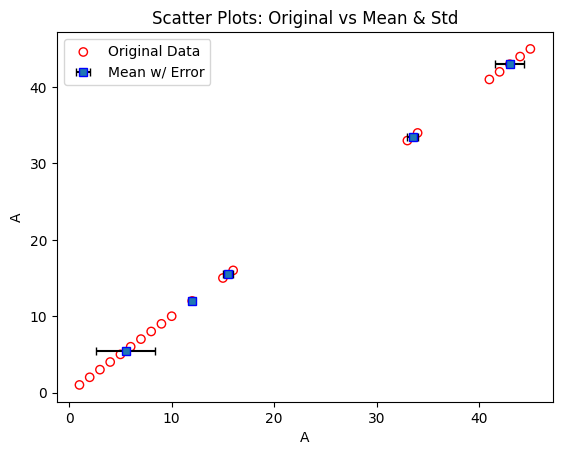

In [22]:
import matplotlib.pyplot as plt

# Original data as unfilled red circles
plt.scatter(dataset["A"], dataset["A"], facecolors='none', edgecolors='red', marker='o', label='Original Data')

# Mean vs Mean with error bars in x, blue square markers, green error bars, and caps
plt.errorbar(meanlist, meanlist, 
             xerr=stdlist, 
             marker='s', 
             #markerfacecolor='blue', 
             markeredgecolor='blue', 
             ecolor='black', 
             capsize=3,
             linestyle='none',
             label='Mean w/ Error')

plt.xlabel("A")
plt.ylabel("A")
plt.title("Scatter Plots: Original vs Mean & Std")
plt.legend()
plt.show()


In [11]:
np.mean([41,42,43,44,45])

43.0